In [1]:
import matplotlib.pyplot as pl
import numpy as np
import skope
%matplotlib inline

Initialize star object by calling skope.Target( ). By default, Target( ) uses the motion vectors of the target EPIC ID: 205998445, a fairly standard C3 *K2* target. This can be changed with the $\texttt{ID}$ parameter.  

The GenerateLightCurve( ) function takes a stellar magnitude and returns a full light curve ($\texttt{fpix}$), a 1-dimensional flux light curve ($\texttt{flux}$), and a light curve containing the error in each pixel ($\texttt{ferr}$).

In [2]:
star = skope.Target(variable=True, transit=True)
fpix, flux, ferr = star.GenerateLightCurve(12.,ncadences=1000)

100%|██████████| 1000/1000 [00:48<00:00, 20.55it/s]


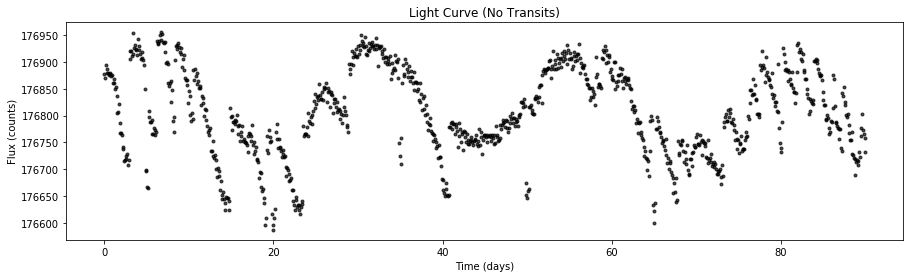

In [3]:
fig = pl.figure(figsize=(15,4));
pl.plot(star.t,flux,'k.', alpha=.7);
pl.title('Light Curve (No Transits)')
pl.xlabel('Time (days)');
pl.ylabel('Flux (counts)');

Now, add a transit to the light curve with the AddTransit( ) function. AddTransit( ) takes in a full light curve and returns the light curve with added transits and the 1-dimensional flux light curve with added transits.

In [ ]:
fpix_tr, flux_tr = star.AddTransit(fpix)

In [ ]:
fig = pl.figure(figsize=(15,4));
pl.plot(star.t,star.trn*np.mean(flux),'r');
pl.plot(star.t,flux_tr,'k.',alpha=.7);
pl.title('Light Curve (with Transits)');
pl.xlabel('Time (days)');
pl.ylabel('Flux (counts)');

In [ ]:
detrend, rawflux = star.Detrend(fpix_tr)

In [ ]:
fig = pl.figure(figsize=(15,4))
pl.plot(star.t, rawflux, 'r.', alpha=0.5);
pl.plot(star.t, detrend, 'k.');

To create a light curve with increased spacecraft roll, the $\texttt{roll}$ parameter (default to 1.0) can be changed in the GenerateLightCurve( ) function. Let's generate a light curve with 5.0x current spacecraft motion. To avoid flux loss off the edge of the aperture, the $\texttt{apsize}$ parameter has been increased to 9 (from default 7).

In [ ]:
star = skope.Target()
highroll_fpix, highroll_flux, highroll_ferr = star.GenerateLightCurve(12., roll=5., apsize=9)

In [ ]:
fig = pl.figure(figsize=(15,4));
pl.plot(star.t,highroll_flux,'k.', alpha=.7);
pl.title('High Roll Light Curve (No Transits)')
pl.xlabel('Time (days)');
pl.ylabel('Flux (counts)');

In [ ]:
hr_fpix_tr, hr_flux_tr = star.AddTransit(highroll_fpix)

In [ ]:
fig = pl.figure(figsize=(15,4));
pl.plot(star.t,star.trn*np.mean(highroll_flux),'r');
pl.plot(star.t,hr_flux_tr,'k.',alpha=.7);
pl.title('High Roll Light Curve (with Transits)');
pl.xlabel('Time (days)');
pl.ylabel('Flux (counts)');

In [ ]:
detflux, rawflux = star.Detrend(hr_fpix_tr)

In [ ]:
fig = pl.figure(figsize=(15,4));
pl.plot(star.t,star.trn*np.mean(detflux),'r');
pl.plot(star.t,detflux,'k.');
pl.title('High Roll Light Curve (with Transits)');
pl.xlabel('Time (days)');
pl.ylabel('Flux (counts)');

In [ ]:
det = star.DisplayDetector()

In [ ]:
fpix